<a href="https://colab.research.google.com/github/kimdongha723/kdh723/blob/main/BTC_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
!pip install pyupbit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [83]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [84]:
import pyupbit

In [85]:
#BTC 최근 200시간의 데이터 불러옴
df = pyupbit.get_ohlcv("KRW-sand", interval="minute60")
df

,open,high,low,close,volume,value
2022-09-01 08:00:00,1305.0,1310.0,1285.0,1295.0,1.724382e+06,2.235679e+09
2022-09-01 09:00:00,1300.0,1305.0,1275.0,1285.0,2.929823e+06,3.767660e+09
2022-09-01 10:00:00,1285.0,1295.0,1280.0,1295.0,9.026322e+05,1.161786e+09
2022-09-01 11:00:00,1290.0,1295.0,1285.0,1285.0,4.584045e+05,5.916426e+08
2022-09-01 12:00:00,1290.0,1295.0,1275.0,1285.0,1.073790e+06,1.379701e+09
...,...,...,...,...,...,...
2022-09-09 11:00:00,1280.0,1290.0,1275.0,1280.0,1.207070e+06,1.546766e+09
2022-09-09 12:00:00,1280.0,1300.0,1280.0,1300.0,1.831295e+06,2.368349e+09
2022-09-09 13:00:00,1295.0,1315.0,1295.0,1305.0,2.604024e+06,3.404727e+09
2022-09-09 14:00:00,1305.0,1330.0,1305.0,1320.0,2.396610e+06,3.155492e+09


In [86]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2022-09-01 08:00:00,1295.0
1,2022-09-01 09:00:00,1285.0
2,2022-09-01 10:00:00,1295.0
3,2022-09-01 11:00:00,1285.0
4,2022-09-01 12:00:00,1285.0
...,...,...
195,2022-09-09 11:00:00,1280.0
196,2022-09-09 12:00:00,1300.0
197,2022-09-09 13:00:00,1305.0
198,2022-09-09 14:00:00,1320.0


In [87]:
#prophet 불러옴
from fbprophet import Prophet

In [88]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [89]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=60, freq='H')
forecast = model.predict(future)

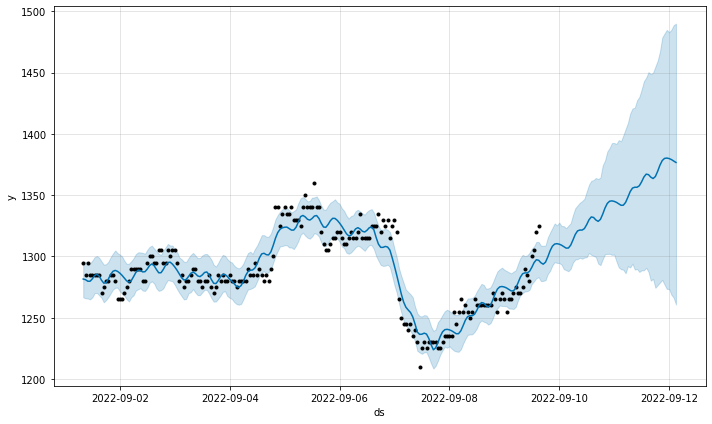

In [90]:
#그래프1
fig1 = model.plot(forecast)

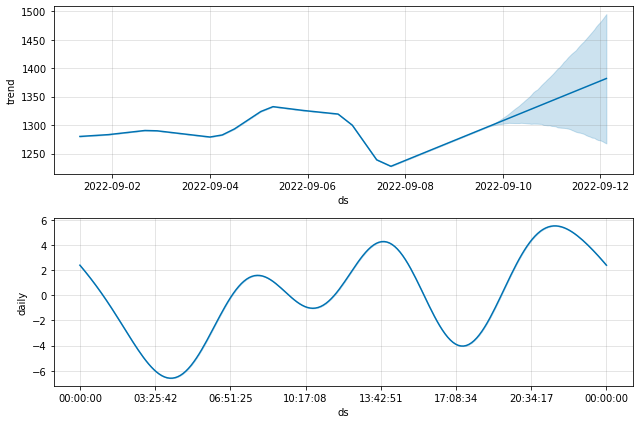

In [91]:
 #그래프2
fig2 = model.plot_components(forecast)